In [1]:
using Plots

In [2]:
include("../src/SpinonStructure.jl")
include("../src/BZMath.jl")


using .BZmath
using .SpinonStructure
using StaticArrays
using SparseArrays
using LinearAlgebra
using BenchmarkTools

# Gauge freedom

Here, I construct two sim bodies with the same flux pattern (see assertion), but different gauges.

Though the spinon spectrum may depend nontrivially on gauge, the continuum should not.

In [3]:
B = [0.02,0.0,0.0]

sim0 = SimulationParameters("0flux_prim",
    lattice=geom.PyroPrimitive(1,1,1),
    A=zeros(1,4),
    Jpm=-0.046,
    B=B,
    n_samples=10000
    )

sim1 = SimulationParameters("0flux_std_gauge",
    lattice=geom.PyroPrimitive(2,2,1),
    A=zeros(4,4),
    Jpm=-0.046,
    B=B,
    n_samples=10000
    )

sim2 = SimulationParameters("0flux_gauge_2",
    lattice=geom.PyroPrimitive(2,2,1),
    # A=[1 1 0 0; 0 0 -1 -1; 1 1 0 0; 1 1 0 0],
    A=[2 2 2 2; -1 -1 -1 -1; 0 0 0 0; 1 1 1 1],
    Jpm=-0.046,
    B=B,
    n_samples=10000
    )

# large gauge t'form
sim3 = SimulationParameters("0flux_gauge_3",
    lattice=geom.PyroPrimitive(2,2,1),
    A=[1 1 0 0; 1 1 0 0; 1 1 0 0; 1 1 0 0],
    Jpm=-0.046,
    B=B,
    n_samples=10000
    )


sim222 = SimulationParameters("0flux_222",
    lattice=geom.PyroPrimitive(2,2,2),
    # A=[1 1 0 0; 0 0 -1 -1; 1 1 0 0; 1 1 0 0],
    A=zeros(2*2*2, 4),
    Jpm=-0.046,
    B=B,
    n_samples=10000
    )

@assert norm(calc_fluxes(sim2) - calc_fluxes(sim1)) < 1e-10
@assert norm(calc_fluxes(sim3) - calc_fluxes(sim1)) < 1e-10

In [4]:
csim0 = CompiledModel(sim0)

CompiledModel(SimulationParameters([0.0 0.0 0.0 0.0], -0.046, [0.02, 0.0, 0.0], Main.SpinonStructure.PyrochloreGeometry.PyroPrimitive([1, 1, 1], SVector{3, Int64}[[0, 0, 0], [2, 2, 2]], SVector{3, Int64}[[1, 1, 1], [1, -1, -1], [-1, 1, -1], [-1, -1, 1]]), 2.0, 10000, "0flux_prim"), [2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2], ComplexF64[-0.0115 - 0.0im, -0.0115 - 0.0im, -0.0115 - 0.0im, -0.0115 - 0.0im, -0.0115 - 0.0im, -0.0115 - 0.0im, -0.0115 - 0.0im, -0.0115 - 0.0im, -0.0115 - 0.0im, -0.0115 - 0.0im, -0.0115 - 0.0im, -0.0115 - 0.0im, 0.0028867513459481294 - 0.0im, 0.0028867513459481294 - 0.0im, -0.0028867513459481294 + 0.0im, -0.0028867513459481294 + 0.0im], [0.0 4.0 … 2.0 2.0; 4.0 0.0 … -2.0 2.0; 4.0 4.0 … 2.0 -2.0], 0.1413565212943492)

In [5]:
csim222 = CompiledModel(sim222, csim0.lambda)

CompiledModel(SimulationParameters([0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; … ; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0], -0.046, [0.02, 0.0, 0.0], Main.SpinonStructure.PyrochloreGeometry.PyroPrimitive([2, 2, 2], SVector{3, Int64}[[0, 0, 0], [4, 4, 0], [4, 0, 4], [8, 4, 4], [0, 4, 4], [4, 8, 4], [4, 4, 8], [8, 8, 8], [2, 2, 2], [6, 6, 2], [6, 2, 6], [10, 6, 6], [2, 6, 6], [6, 10, 6], [6, 6, 10], [10, 10, 10]], SVector{3, Int64}[[1, 1, 1], [1, -1, -1], [-1, 1, -1], [-1, -1, 1], [5, 5, 1], [5, 3, -1], [3, 5, -1], [3, 3, 1], [5, 1, 5], [5, -1, 3]  …  [3, 9, 3], [3, 7, 5], [5, 5, 9], [5, 3, 7], [3, 5, 7], [3, 3, 9], [9, 9, 9], [9, 7, 7], [7, 9, 7], [7, 7, 9]]), 2.0, 10000, "0flux_222"), [9, 9, 9, 13, 13, 11, 1, 1, 1, 5  …  6, 6, 7, 7, 7, 7, 8, 8, 8, 8], [13, 11, 10, 11, 10, 10, 5, 3, 2, 3  …  16, 13, 15, 11, 13, 16, 16, 12, 14, 15], ComplexF64[-0.0115 - 0.0im, -0.0115 - 0.0im, -0.0115 - 0.0im, -0.0115 - 0.0im, -0.0115 - 0.0im, -0.0115 - 0.0im, -0.0115 - 0.0im, -0.0115 - 0.0im, -0.0115 - 0.0im, -0.0115 

In [6]:
csim1 = CompiledModel(sim1)
csim2 = CompiledModel(sim2)
csim3 = CompiledModel(sim3)
@assert norm(csim1.lambda - csim2.lambda) < 1e-3
@assert norm(csim1.lambda - csim3.lambda) < 1e-3
println("simi.λ -> $(csim1.lambda)  sim2.λ -> $(csim2.lambda)")

simi.λ -> 0.141220535898398  sim2.λ -> 0.1415081550473231


In [7]:
"""
global_g must be a row vector
"""
function global_gauge(A_original, global_g)
    return A_original .+ global_g
end

"""
lattice_gradient(lat::geom.PyroPrimitive, G::Vector{Float64})
Calculates the lattice gradient of G, [dG]_{rA,μ}
where rA is an A site position, μ is a sublattice
"""
function lattice_gradient(lat::geom.PyroPrimitive, G::Vector{Float64})
    A_sites = geom.A_sites(lat)
    @assert size(G) == size(lat.tetra_sites)
    retval = zeros(length(A_sites),4)
    for (i,rA) in enumerate(A_sites)
        for μ=1:4
            retval[i,μ] = G[i] - G[geom.tetra_idx(lat, rA + 2 .*geom.pyro[μ])]
        end
    end
    return retval
end

lat = geom.PyroPrimitive(2,2,1)
gaugevec = 2π .*rand(Float64, size(lat.tetra_sites)).-π

sim_test = SimulationParameters("0flux_random",
    lattice=lat,
    # A=[1 1 0 0; 0 0 -1 -1; 1 1 0 0; 1 1 0 0],
    A=lattice_gradient(lat, gaugevec),
    Jpm=-0.046,
    B=[0.,0.,0.],
    n_samples=10000
    )
@assert norm(calc_fluxes(sim1)-calc_fluxes(sim_test)) < 1e-14

In [8]:
Egrid = collect(range(0,2.2,100));
ip = IntegrationParameters(n_K_samples=10000, broaden_factor=2)
Q = SVector{3}(geom.high_symmetry_points["\\Gamma"])


3-element SVector{3, Float64} with indices SOneTo(3):
 0.0
 0.0
 0.0

In [9]:
gaugevec = 2π .*rand(Float64, size(lat.tetra_sites)).-π

    sim_test = SimulationParameters("0flux_random",
    lattice=lat,
    # A=[1 1 0 0; 0 0 -1 -1; 1 1 0 0; 1 1 0 0],
    A=lattice_gradient(lat, gaugevec),
    Jpm=-0.046,
    B=B,
    n_samples=10000
    )

@assert norm(calc_fluxes(sim1)-calc_fluxes(sim_test)) < 1e-14



ch_test = SpinonStructure.CompiledHamiltonian(sim_test);

In [10]:
H1 = SpinonStructure.calc_hopping(csim1, Q)


8×8 SparseMatrixCSC{ComplexF64, Int64} with 48 stored entries:
      -0.023+0.0im       -0.046+0.0im  …              ⋅    
      -0.046+0.0im       -0.023+0.0im      0.00288675+0.0im
      -0.046+0.0im       -0.023+0.0im     -0.00288675+0.0im
      -0.023+0.0im       -0.046+0.0im                 ⋅    
             ⋅      -0.00288675+0.0im          -0.023+0.0im
 -0.00288675+0.0im              ⋅      …       -0.046+0.0im
  0.00288675+0.0im              ⋅              -0.046+0.0im
             ⋅       0.00288675+0.0im          -0.023+0.0im

In [11]:
H2 = SpinonStructure.calc_hopping(ch_test, Q)

8×8 SparseMatrixCSC{ComplexF64, Int64} with 48 stored entries:
      -0.023+0.0im         …              ⋅    
   0.0358203+0.0288601im      0.000502911+0.00284261im
  -0.0326093-0.0324443im      0.000203192+0.00287959im
  0.00602437-0.022197im                   ⋅    
             ⋅                 -0.0229423-0.0016286im
 0.000235419+0.00287714im  …    0.0273175-0.0370102im
 -0.00161252+0.00239439im      -0.0444466+0.0118531im
             ⋅                     -0.023+0.0im

In [12]:
gauge = diagm(exp.(-1im.*gaugevec))
diff = gauge'*H2*gauge  - H1

display(norm.(diff) .> 1e-15)
if norm(diff) < 1e-14
    println("gauge transform behaves correctly")
else
    println("Something is very wrong!!!")
end

8×8 BitMatrix:
 0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0

gauge transform behaves correctly


In [13]:
H1[1:4,5:8]

4×4 SparseMatrixCSC{ComplexF64, Int64} with 8 stored entries:
             ⋅      -0.00288675+0.0im   0.00288675+0.0im              ⋅    
 -0.00288675+0.0im              ⋅                  ⋅       0.00288675+0.0im
  0.00288675+0.0im              ⋅                  ⋅      -0.00288675+0.0im
             ⋅       0.00288675+0.0im  -0.00288675+0.0im              ⋅    

In [14]:
H2[1:4,5:8]

4×4 SparseMatrixCSC{ComplexF64, Int64} with 8 stored entries:
              ⋅             …              ⋅    
 -0.000702929-0.00279986im     0.000502911+0.00284261im
 -0.000406582-0.00285798im     0.000203192+0.00287959im
              ⋅                            ⋅    

In [15]:
ev1 = SpinonStructure.diagonalise_M(csim1, Q);
ev2 = SpinonStructure.diagonalise_M(ch_test, Q);
# ev3 = SpinonStructure.diagonalise_M(csim3, Q+shift);

In [16]:
@assert norm(ev1.values - ev2.values) < 1e-10

# diff = (ev1.vectors - ev2.vectors)

# findall( abs.(diff) .> 1e-10 )

In [17]:
path = generate_path(geom.high_symmetry_points, split("\\Gamma X W K \\Gamma L U W"), points_per_unit=150, K_units=2π/8);

function plot_spinons(f;color=:black)
    E = reduce(vcat, map(f, path.K )')

    plot!(path.t,E,legend=false,color=color,lw=0.5)
    xticks!(path.ticks_t, path.ticks_label)
    ylims!(0.,maximum(E))
end


plot_spinons (generic function with 1 method)

In [18]:
A4 = repeat(rand(4)',4)*2π

# large gauge t'form
sim4 = SimulationParameters("0flux_gauge_3",
    lattice=geom.PyroPrimitive(2,2,1),
    A=A4,
    Jpm=-0.046,
    B=[0.,0.,0.],
    n_samples=10000
    )

csim4 = CompiledModel(sim4)

CompiledModel(SimulationParameters([4.851876985065811 1.6419312808842097 6.009002126083975 0.23158956369166775; 4.851876985065811 1.6419312808842097 6.009002126083975 0.23158956369166775; 4.851876985065811 1.6419312808842097 6.009002126083975 0.23158956369166775; 4.851876985065811 1.6419312808842097 6.009002126083975 0.23158956369166775], -0.046, [0.0, 0.0, 0.0], Main.SpinonStructure.PyrochloreGeometry.PyroPrimitive([2, 2, 1], SVector{3, Int64}[[0, 0, 0], [4, 0, 4], [0, 4, 4], [4, 4, 8], [2, 2, 2], [6, 2, 6], [2, 6, 6], [6, 6, 10]], SVector{3, Int64}[[1, 1, 1], [1, -1, -1], [-1, 1, -1], [-1, -1, 1], [5, 1, 5], [5, -1, 3], [3, 1, 3], [3, -1, 5], [1, 5, 5], [1, 3, 3], [-1, 5, 3], [-1, 3, 5], [5, 5, 9], [5, 3, 7], [3, 5, 7], [3, 3, 9]]), 2.0, 10000, "0flux_gauge_3"), [5, 5, 5, 7, 7, 6, 1, 1, 1, 3  …  2, 2, 3, 3, 3, 3, 4, 4, 4, 4], [7, 6, 5, 6, 5, 5, 3, 2, 1, 2  …  5, 6, 7, 5, 8, 7, 8, 6, 7, 8], ComplexF64[0.011473145655776609 + 0.0007854481277171328im, -0.004622695884744479 + 0.0105299896

In [19]:
B = geom.primitive_recip_basis

3×3 SMatrix{3, 3, Float64, 9} with indices SOneTo(3)×SOneTo(3):
 -0.785398   0.785398   0.785398
  0.785398  -0.785398   0.785398
  0.785398   0.785398  -0.785398

In [20]:
B*[0.5,0.5,0]/2π

3-element SVector{3, Float64} with indices SOneTo(3):
 0.0
 0.0
 0.125

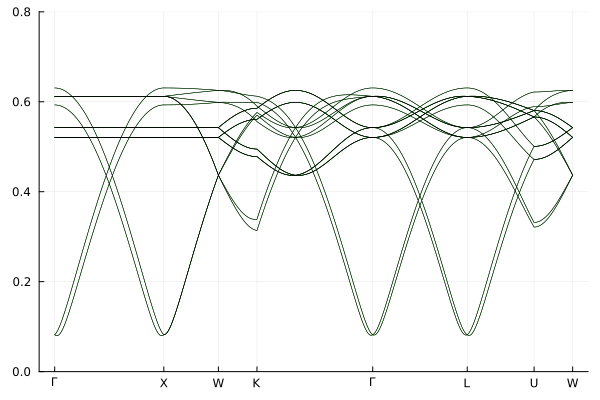

In [21]:
shift3 = reduce(hcat, geom.pyro)*sim3.A[1,:]/8
shift4 = reduce(hcat, geom.pyro)*sim4.A[1,:]/8
plot()

# plot_spinons(k -> spinon_dispersion(k,csim2)[1] )
# plot_spinons(k -> spinon_dispersion(k+shift3,csim3)[1],color=:red )
# plot_spinons(k -> spinon_dispersion(k+shift4,csim4)[1],color=:green )

plot_spinons(k -> spinon_dispersion(k,csim222)[1],color=:green )

plot_spinons(k -> spinon_dispersion(k,csim0)[1] )
plot_spinons(k -> spinon_dispersion(k+B*[0.5,0,0],csim0)[1] )
plot_spinons(k -> spinon_dispersion(k+B*[0,0.5,0],csim0)[1] )
plot_spinons(k -> spinon_dispersion(k+B*[0,0,0.5],csim0)[1] )

plot_spinons(k -> spinon_dispersion(k+B*[0.5,0.5,0],csim0)[1] )
plot_spinons(k -> spinon_dispersion(k+B*[0,0.5,0.5],csim0)[1] )
plot_spinons(k -> spinon_dispersion(k+B*[0.5,0,0.5],csim0)[1] )

plot_spinons(k -> spinon_dispersion(k+B*[0.5,0.5,0.5],csim0)[1] )

# It follows that the bands are correct

ylims!(0,0.8)

In [22]:
csim = csim1

Q = SVector{3}([0.,0.,0])
P = SVector{3}([0.,0,0])
delta = [1,0,0]

E1, S1 = corr_at(Q, P, csim)
E2, S2 = corr_at(Q+ geom.primitive_recip_basis*delta, P,csim)
@assert norm(E1 - E2) < 1e-9
        # @assert norm(S1 - S2) < 1e-10 

norm.(S1 - S2)

8×8 Matrix{Float64}:
   1.64215e-47  1.5237e-63   0.0          …  6.84228e-49  7.64654e-66
 465.761        1.50847e-33  4.44089e-16     8.88178e-16  1.60733e-35
   2.22045e-16  5.38425e-30  0.92287         3.81161e-34  2.32304e-32
   6.66134e-16  8.11011e-32  1.11022e-16     2.77556e-17  4.06998e-34
   4.44089e-16  7.78505e-32  1.11022e-16     1.54074e-33  3.90685e-34
   2.22045e-16  5.16845e-30  0.885881     …  5.55112e-17  2.22993e-32
   1.02634e-48  9.51567e-65  0.0             4.27642e-50  4.77535e-67
   2.22045e-16  1.63835e-33  2.77556e-17     2.67065      2.67404e-36

In [23]:
b = geom.primitive_recip_basis

mats = [SpinonStructure.calc_hopping(csim1, Q+b*n) for n in [[1,0,0],[1,1,0],[0,-1,-1],[-5,1,6]]]
[norm(SpinonStructure.calc_hopping(csim1, Q)-M) for M in mats]

4-element Vector{Float64}:
 0.016329931618554526
 0.023094010767585035
 0.023094010767585035
 0.023094010767585035

In [24]:
ip = IntegrationParameters(n_K_samples=20000, integration_method="MC")
Q = SVector{3}(geom.high_symmetry_points["X"])
res0 = spectral_weight(Q, Egrid, csim0, ip);
res1 = spectral_weight(Q, Egrid, csim1, ip);
res2 = spectral_weight(Q, Egrid, csim2, ip);
res3 = spectral_weight(Q, Egrid, csim3, ip);
res4 = spectral_weight(Q, Egrid, csim4, ip);

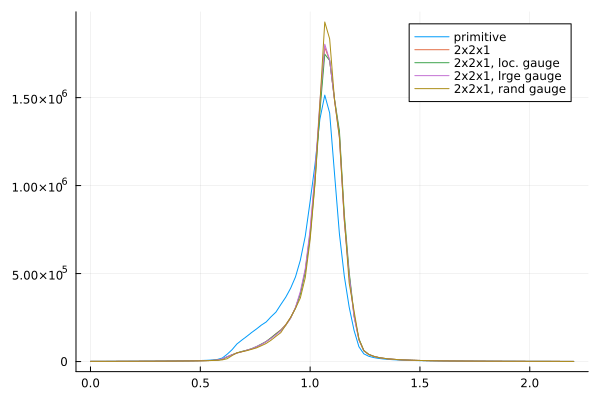

In [25]:


# these curves should be the same
plot()
plot!(Egrid, real.(res0.Sqω_pm)*4,label="primitive")
plot!(Egrid, real.(res1.Sqω_pm), label="2x2x1")
plot!(Egrid, real.(res2.Sqω_pm), label="2x2x1, loc. gauge")
plot!(Egrid, real.(res3.Sqω_pm), label="2x2x1, lrge gauge")
plot!(Egrid, real.(res4.Sqω_pm), label="2x2x1, rand gauge")

In [26]:
q = SVector{3}(geom.high_symmetry_points["\\Gamma"])
p = SVector{3}(geom.high_symmetry_points["X"])

corr1 = SpinonStructure.corr_at(q,p, csim1)
corr2 = SpinonStructure.corr_at(q, p+shift3, csim1)

([0.7054817007733818 0.7427002736753182 … 0.9646567529393175 0.9646567529393177; 0.7427002736753182 0.7799188465772546 … 1.001875325841254 1.001875325841254; … ; 0.9646567529393179 1.0018753258412543 … 1.2238318051052537 1.2238318051052537; 0.9646567529393179 1.0018753258412543 … 1.2238318051052537 1.2238318051052537], ComplexF64[5.158331362001265 - 2.6841232567972346e-16im 4.66600903207801 + 3.370841648302958e-17im … -1.3877787807814457e-17 + 0.0im 5.891206239792712e-34 + 1.8816263559049057e-48im; 4.666009032078018 + 1.289173477130801e-17im 4.220675012817908 - 3.509714842284681e-17im … -1.3877787807814457e-17 + 9.244463733058732e-33im 5.328936742451435e-34 + 1.5395124730131047e-48im; … ; 3.6977329756859e-32 - 5.131708243377016e-49im 3.3448133227465364e-32 + 1.2829270608442539e-48im … -1.8388621205434306e-48 - 1.1973985901213036e-48im 8.581321939569464e-63 + 1.349401336733507e-79im; 1.1102230246251565e-16 + 3.0814879110195774e-33im 6.938893903907228e-18 + 6.162975822039155e-33im … 1.04

In [27]:
eigvals(corr1[1])

8-element Vector{Float64}:
 -0.008810611135787624
 -3.977085113725561e-16
 -3.068166173297673e-16
 -1.49445535563424e-26
  1.4944234931381044e-26
  1.2936485104795985e-20
  8.339206535074682e-18
  8.93558549252989

In [28]:
eigvals(corr2[1])

8-element Vector{Float64}:
 -0.060348504349204635
 -2.1180126127405807e-16
 -1.424358223738624e-16
 -2.321923334755979e-18
 -7.009527762259035e-36
  1.8077464526999222e-32
  4.576732419205876e-16
  8.244138745563628

In [46]:
stest = SimulationParameters("0ππ0-along",
        A= [0 π π 0; 0 0 0 0; 0 π π 0; 0 0 0 0 ],
        lattice=geom.PyroPrimitive(1,2,2),
        Jpm=0.3,
        B=[1.,1.,0.]/√2,
        n_samples=10000,
        kappa=2.0
        )
    

calc_fluxes(stest)

4×4 Matrix{Float64}:
 0.0  -3.14159   3.14159  0.0
 0.0   3.14159  -3.14159  0.0
 0.0  -3.14159   3.14159  0.0
 0.0   3.14159  -3.14159  0.0